In [27]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
import sys
from pathlib import Path
sys.path.append("..")

from scripts.data_utils.eda import FinanceEDA
# from scripts.data_utils.utils import *
from scripts.data_utils.loader import FinanceDataLoader
from scripts.data_utils.cleaner import FinanceDataCleaner

In [6]:
tickers = ["TSLA", "BND", "SPY"]
loader = FinanceDataLoader(tickers)

In [8]:
data = loader.fetch_data()
data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


{'TSLA': Price            Close        High         Low        Open    Volume Ticker
 Ticker            TSLA        TSLA        TSLA        TSLA      TSLA       
 Date                                                                       
 2015-01-02   14.620667   14.883333   14.217333   14.858000  71466000   TSLA
 2015-01-05   14.006000   14.433333   13.810667   14.303333  80527500   TSLA
 2015-01-06   14.085333   14.280000   13.614000   14.004000  93928500   TSLA
 2015-01-07   14.063333   14.318667   13.985333   14.223333  44526000   TSLA
 2015-01-08   14.041333   14.253333   14.000667   14.187333  51637500   TSLA
 ...                ...         ...         ...         ...       ...    ...
 2025-01-24  406.579987  418.880005  405.779999  414.450012  56427100   TSLA
 2025-01-27  397.149994  406.690002  389.000000  394.799988  58125500   TSLA
 2025-01-28  398.089996  400.589996  386.500000  396.910004  48910700   TSLA
 2025-01-29  389.100006  398.589996  384.480011  395.209991  6803360

In [10]:
loader.save_data(data)

Data saved in ../resources/data/


In [12]:
cleaner = FinanceDataCleaner()
data = cleaner.load_data()
data

ValueError: Missing column provided to 'parse_dates': 'Date'

In [16]:
cleaner.check_missing_values(data)


Missing values in TSLA:
Series([], dtype: int64)

Missing values in BND:
Series([], dtype: int64)

Missing values in SPY:
Series([], dtype: int64)


In [17]:
cleaned_data = cleaner.handle_missing_values(data)

c:\Users\Darkles\10academy\10Academy-Kifiya-Week-11\notebooks\..\scripts\data_utils\cleaner.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)


In [29]:
eda = FinanceEDA(data)
eda

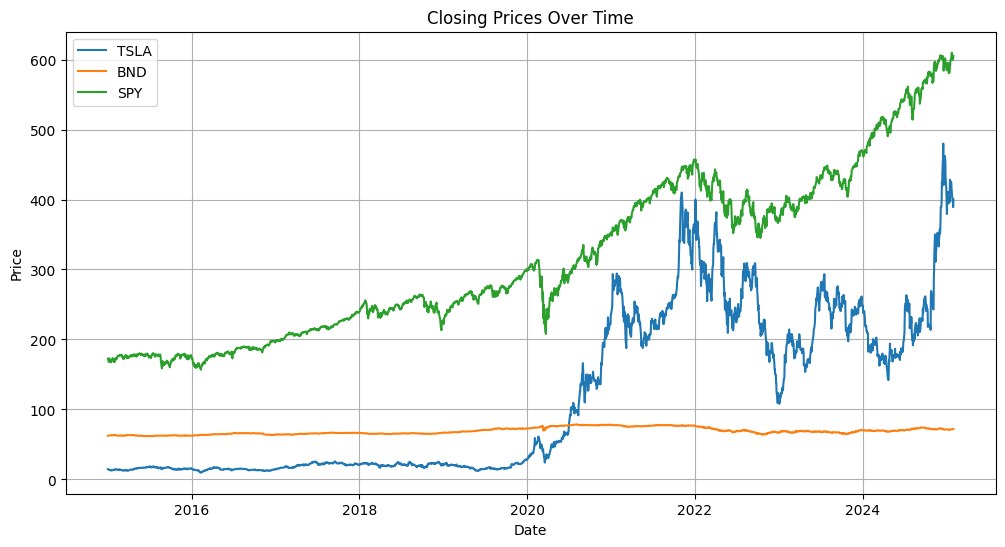

In [22]:
eda.plot_closing_prices()

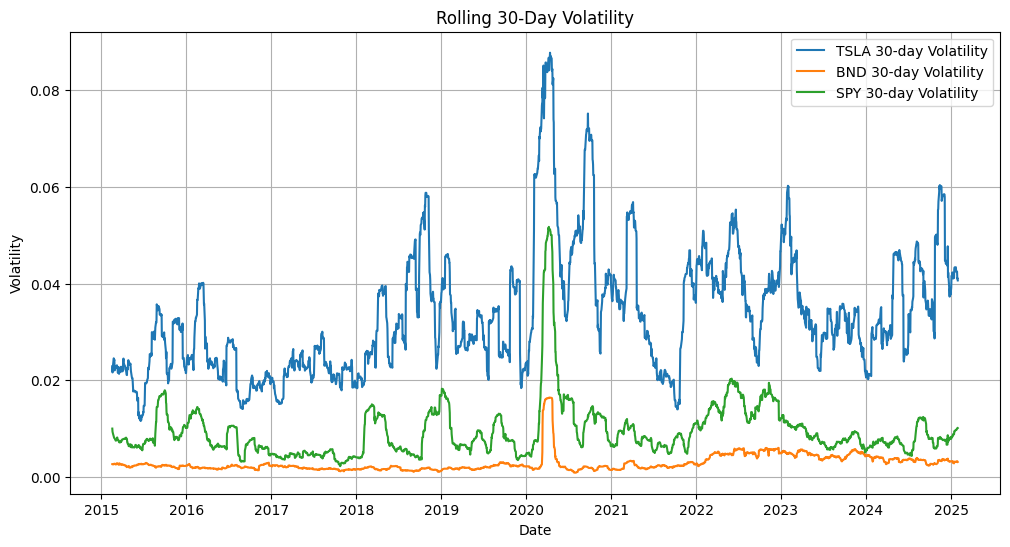

In [23]:
eda.plot_volatility()

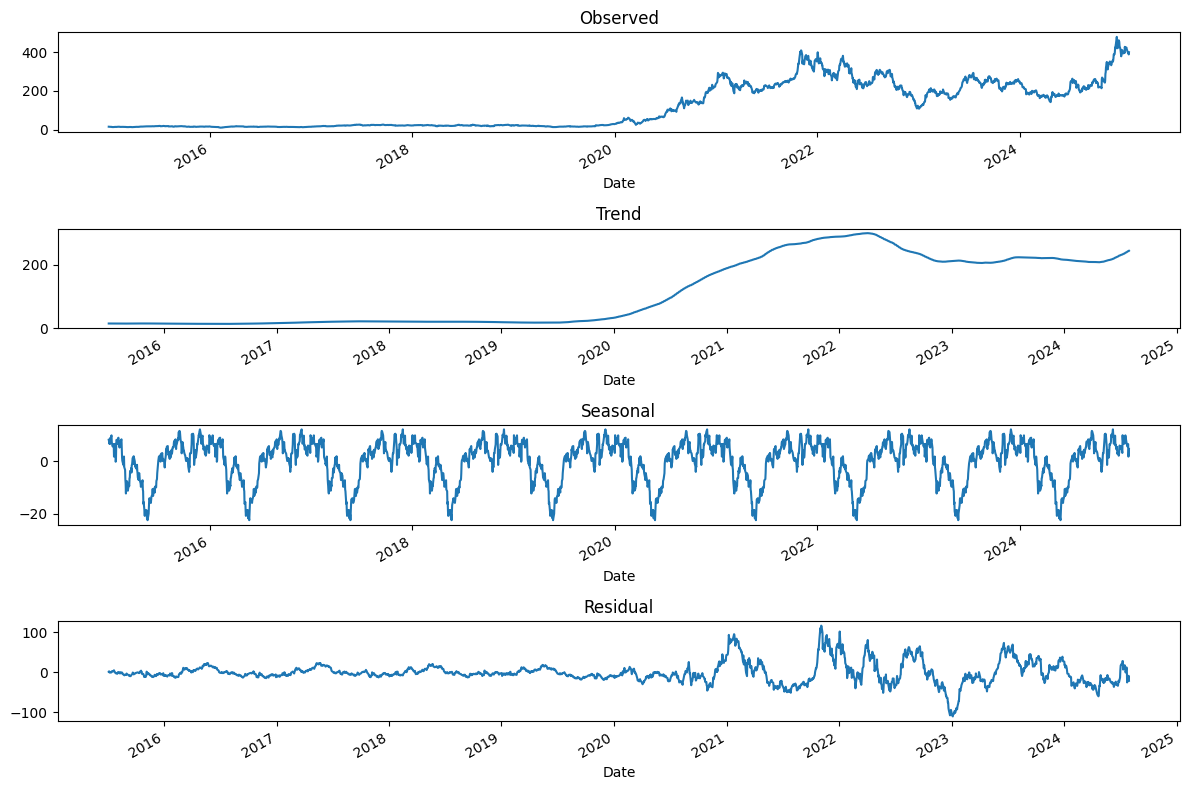

In [24]:
eda.decompose_time_series("TSLA")

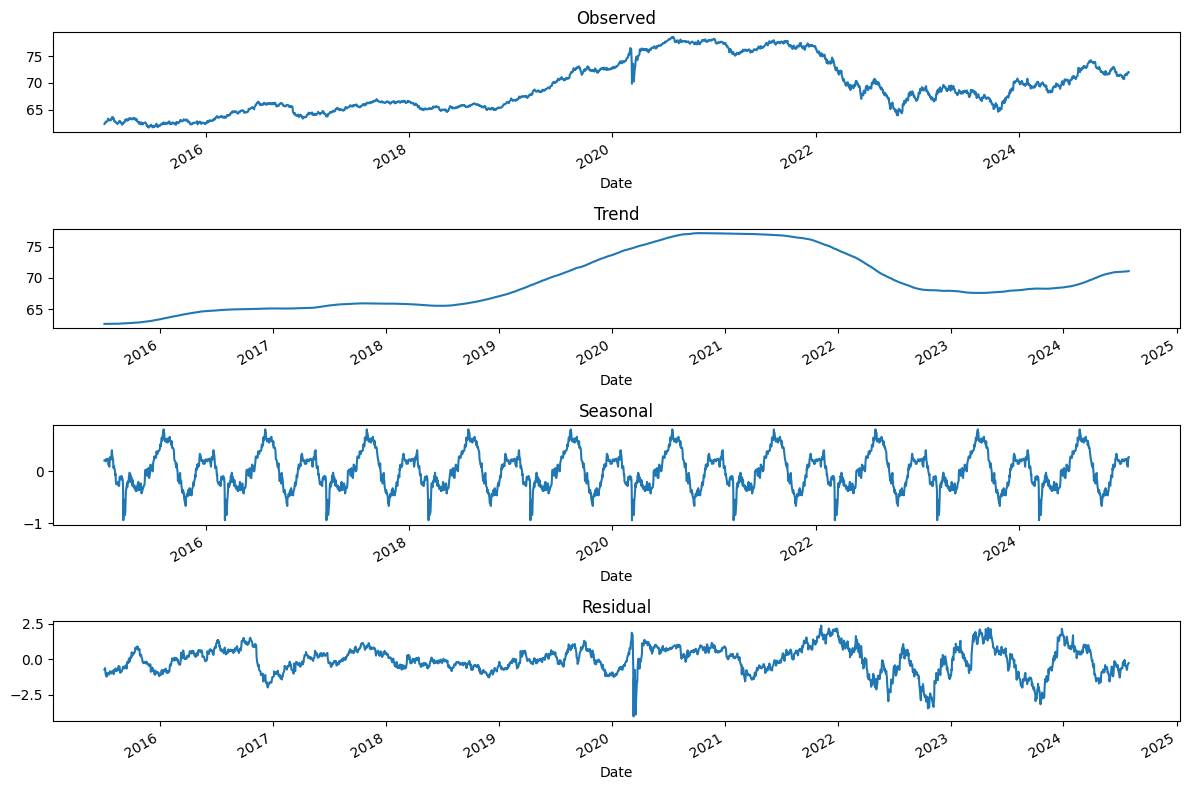

In [25]:
eda.decompose_time_series("BND")


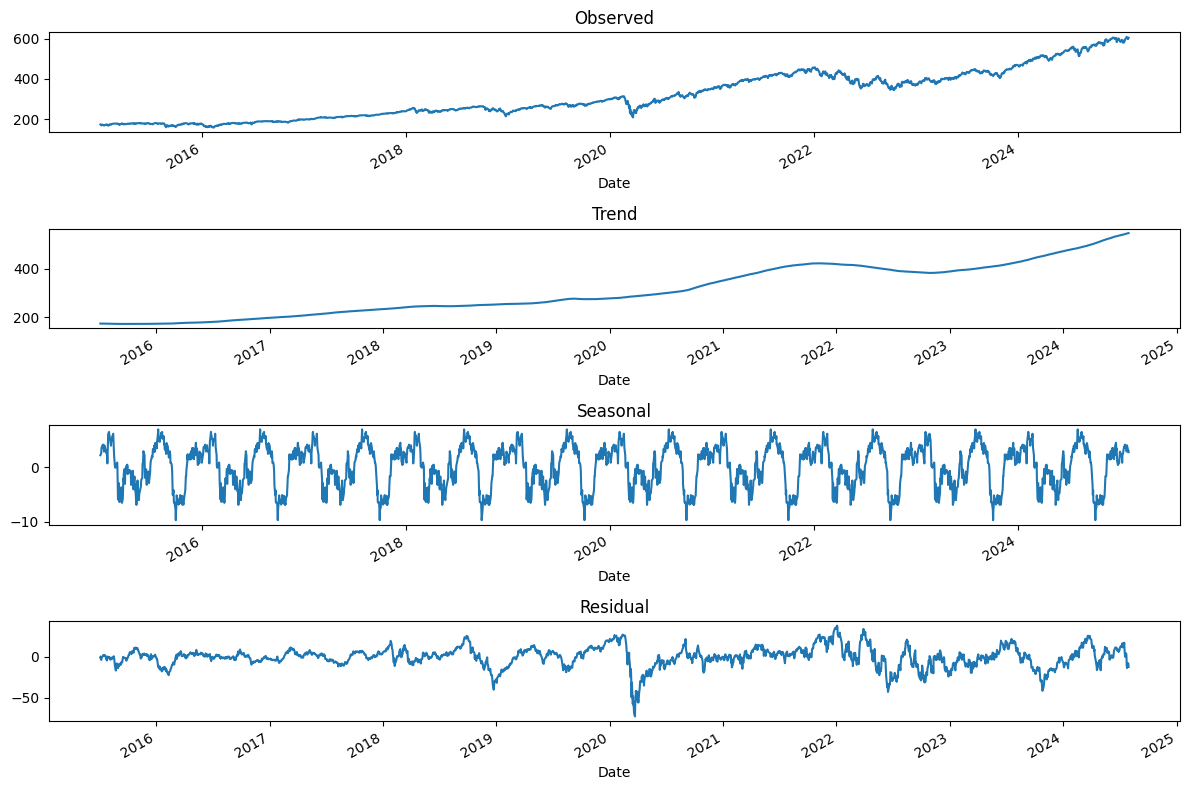

In [26]:
eda.decompose_time_series("SPY")


In [ ]:
eda.detect_outliers()

{'TSLA': Series([], Name: Daily Return, dtype: float64),
 'BND': Series([], Name: Daily Return, dtype: float64),
 'SPY': Series([], Name: Daily Return, dtype: float64)}

In [35]:
eda.get_sharpe_ratios()


{'TSLA': nan, 'BND': nan, 'SPY': nan}

In [37]:
eda.get_VaRs()

IndexError: index -1 is out of bounds for axis 0 with size 0

In [38]:
returns = data.pct_change().dropna()
plt.figure(figsize=(12, 6))
plt.plot(returns.index, returns['TSLA'], label='TSLA Daily Returns')
plt.title('TSLA Daily Returns (Volatility)')
plt.legend()
plt.show()

AttributeError: 'dict' object has no attribute 'pct_change'